# GG4257 - Urban Analytics: A Toolkit for Sustainable Urban Development
## Lab Workbook No 2: Data Manipulation and Working with Web Services
---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - Iteration 2024

# Objectives

- Practice and get familiar with the urban data landscape
- Understand the *messiness* of real world (urban) data
- Create common objects used to store data
- Read tabular and spatial data formats into Python
- Subset and merge data
- Manipulate data and calculate new values
- Practice basic techiques of Data Manipulation and learn how to use Python to access programmatically urban data and understand the benefits of it


# Data Manipulation

Access and manipulate data is very important when it comes to work with python or any kind of programming langague, you need to feel confortable by reading and manipulating data in this programatic way. Initially it will seems it is more complicated, but later with practice you will see the advangte of dealing with data in this way. 


## Arrays and Data Frames (Numpy and Pandas)

As you recall from the previous modules ( GG3209), there are two packages that can help you to read data in your computer memory and then let you manipulate them in a more efficient way. 

Two main object types that can be used to store tabular data in Python include the data frame and array. Each column of a data frame must be a single type, but different columns can be different types (e.g. string, float, etc.); all the columns of an array must be the same type. You can create these within Python manually or by reading in other common formats such as spreadsheets or csv files.


In [1]:
import numpy as np
import pandas as pd

#Create two arrays
years = range(2010, 2018) #creates a list of consecutive integers from 2010 to 2017
a = np.repeat(years, 4) #this uses numpy's repeat() function to repeat values
b = np.random.randint(0, 40, 32) # the randint() function can be used to generate random integers - in this case 32 values between 0 and 40
#Create data frame
c = pd.DataFrame({'a':a,'b':b})  #the curly brackets indicate a dictionary

The last line says to make a two column data frame, where the first column is called `'a'` and has the values from the `a` array, and the second column is called `'b'` and contains the values from the `b` array.

You can type `c` into the console to return the whole data frame, however, you might just want to look at the top few rows. This can be achieved with the `head()` method:

In [27]:
#head returns the top five rows
c.head()

,a,b
0,2010,2
1,2010,28
2,2010,5
3,2010,24
4,2011,27


In a similar way you can create arrays using the numpy package.

In [28]:
#Create a list of numbers
a = range(0, 25) #the range function generates a range of integers

b = np.array(a) #creates a one dimensional array
b = b.reshape(5,5) #create an array with 5 rows and 5 columns
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

It is possible to multiply a numeric array by a constant or another array

In [29]:
#Multiply b by 10
b * 10

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [30]:
#Multiply b * b
b * b 

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576]])

Extracting elements from a one dimensional array is the same as a list; for a two dimensional array the slicing is formatted as [row number, column number]. For example:

In [31]:
#Extract the 0 position row
b[0,:]  #the colon means give all elements along that dimension

# If you run this cell you will get the output only from the last part of the script,
# if you want to see the outcome of every part, just copy and paste the code in another code cell

array([0, 1, 2, 3, 4])

In [32]:
#Extract 3 position column
b[:,3]

array([ 3,  8, 13, 18, 23])

In [33]:
#Extract the 2 and 3 position columns
b[:,2:4] # The colon is used to define a numeric vector between the two numbers

array([[ 2,  3],
       [ 7,  8],
       [12, 13],
       [17, 18],
       [22, 23]])

In [34]:
#Extract 0 and 3 position rows
b[[0,3],:] # The list ([0,3]) is used to identify the indexes to be extracted

array([[ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19]])

In [35]:
#Extract the value in the 2 position row and 3 position column
b[2,3]

13

In the data frame that you created earlier, you can use a similar notation to extract values based on the row and column indexes. It is formatted as `.iloc[row index, column index]`.

As you see in the previous practices, `iloc` and `loc` are key methods to explore, filter and manipulate data uisng pandas. So make sure you understand how that work. 

In [36]:
c.iloc[23,1]

10

Data frames can have named rows and columns, which can be used for indexing. It is formatted as `loc[row name, column name]`

In [37]:
c.loc[23,'b']

10

You can also reference the column names themselves using dot notation, for example:

In [38]:
#Return all the values in the column called "a"
c.a

0     2010
1     2010
2     2010
3     2010
4     2011
5     2011
6     2011
7     2011
8     2012
9     2012
10    2012
11    2012
12    2013
13    2013
14    2013
15    2013
16    2014
17    2014
18    2014
19    2014
20    2015
21    2015
22    2015
23    2015
24    2016
25    2016
26    2016
27    2016
28    2017
29    2017
30    2017
31    2017
Name: a, dtype: int64

In [39]:
#A different way of returning the column called "a"
c["a"]

0     2010
1     2010
2     2010
3     2010
4     2011
5     2011
6     2011
7     2011
8     2012
9     2012
10    2012
11    2012
12    2013
13    2013
14    2013
15    2013
16    2014
17    2014
18    2014
19    2014
20    2015
21    2015
22    2015
23    2015
24    2016
25    2016
26    2016
27    2016
28    2017
29    2017
30    2017
31    2017
Name: a, dtype: int64

In [40]:
#Yet another way of returning the column called "a"
c.loc[:,"a"]

0     2010
1     2010
2     2010
3     2010
4     2011
5     2011
6     2011
7     2011
8     2012
9     2012
10    2012
11    2012
12    2013
13    2013
14    2013
15    2013
16    2014
17    2014
18    2014
19    2014
20    2015
21    2015
22    2015
23    2015
24    2016
25    2016
26    2016
27    2016
28    2017
29    2017
30    2017
31    2017
Name: a, dtype: int64

We can also find out what a data frame's column names are using the `columns` attribute:

In [41]:
c.columns

Index(['a', 'b'], dtype='object')

There are many ways you can rename the columns, here one of those:

In [42]:
c = c.rename(columns={'a': 'Year', 'b': 'Count'})
c.head()

,Year,Count
0,2010,2
1,2010,28
2,2010,5
3,2010,24
4,2011,27


# Challenge No 1:

1. Using a Dictionary, create a dataframe (table), with at least 4 columns and more than 100 rows. How come you can create this among data from scratch without defining every single row of data? 
2. Using the appropriate method, create a new DataFrame containing only the first 30 rows and the first 3 columns of the original DataFrame. Name this new DataFrame subset_df.
3. Using the appropriate method, filter the rows from the original dataframe where a numerical attribute(column) is greater than a particular numerical value, and find another categorical attribute that is equal to a specific string or text. Name this new DataFrame filtered_df.
4. Check this website https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html and apply the methods, mean, standard deviation, group_by to run fundamental statistical analysis of your created data frame.
5. Make sure you comment on your code and describe how you are manipulating the data.


In [43]:
# 1. Using a Dictionary, create a dataframe (table), with at least 4 columns and more than 100 rows. How come you can create this among data from scratch without defining every single row of data?
import numpy as np
import pandas as pd

# Create a dictionary with at least 4 columns and more than 100 rows, for this i create 4 arrays to have at least 4 colums and randomize the variables x 125 times to have a minimum of 100 rows (in this case over 100 because i stated 125) (for this i use the randint() function to generate random integers)
# Using NumPy to generate arrays for each column with more than 100 elements saves up the effort from having to define row by row of data until reaching over 100.
names = np.random.choice(['Caroline', 'Carlota', 'Alexander', 'Peia', 'Ricardo', 'Nicholas'], 125)
ages = np.random.randint(15, 20, 125)
nationalities = np.random.choice(['Dutch', 'Spanish', 'Danish', 'Kenyan', 'French', 'Italian'], 125)
specialty = np.random.choice(['Science', 'Humanities', 'Arts', 'Science'], 125)
    
# Create a dictionary with column names as keys and arrays as values according to the variables chosen above
data = {
    'Name': names,
    'Age': ages,
    'Nationality': nationalities,
    'Specialty': specialty
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Displaying the first 5 rows of the DataFrame would use --> df.head(), but i will simply plot 'df' to show at the bottom that the dataframe consists of 120 rows and 4 columns
df

,Name,Age,Nationality,Specialty
0,Caroline,16,Dutch,Humanities
1,Ricardo,17,French,Science
2,Ricardo,16,Kenyan,Science
3,Caroline,19,Danish,Science
4,Ricardo,16,Kenyan,Science
...,...,...,...,...
120,Alexander,17,French,Science
121,Nicholas,15,Kenyan,Arts
122,Nicholas,15,Italian,Science
123,Ricardo,15,Kenyan,Science


In [44]:
# 2. Using the appropriate method, create a new DataFrame containing only the first 30 rows and the first 3 columns of the original DataFrame. Name this new DataFrame subset_df.

import pandas as pd

# Create a dictionary with column names as keys and arrays as values according to the variables chosen above
data = {
    'Name': names,
    'Age': ages,
    'Nationality': nationalities,
    'Specialty': specialty
}

df = pd.DataFrame(data)

# Df is the original DataFrame previously created

# Creating a new DataFrame called subset_df, which includes the first 30 rows and first 3 columns from df using iloc and the ':' colon is used to define a numeric vector between the two numbers
# I use 'iloc' because it is an integer-location based indexing, where rows and columns are specified by their integer indices and the data is selected based on its numerical position in the DataFrame.
# since the instruction name first 30 rows and 3 columns I can just specify by number
subset_df = df.iloc[:30, :3]

# Display the new DataFrame
print(subset_df)

         Name  Age Nationality
0    Caroline   16       Dutch
1     Ricardo   17      French
2     Ricardo   16      Kenyan
3    Caroline   19      Danish
4     Ricardo   16      Kenyan
5     Carlota   17       Dutch
6     Ricardo   15       Dutch
7        Peia   17      Danish
8     Ricardo   17      Kenyan
9     Carlota   15      Danish
10  Alexander   17     Spanish
11       Peia   16       Dutch
12   Nicholas   18     Italian
13       Peia   15      French
14       Peia   18     Italian
15  Alexander   18      Kenyan
16       Peia   19      French
17    Carlota   17      French
18       Peia   16     Italian
19       Peia   16      Kenyan
20    Carlota   17      French
21    Ricardo   18     Italian
22    Ricardo   17     Italian
23       Peia   16     Spanish
24   Caroline   15      French
25   Caroline   18      Danish
26   Nicholas   16       Dutch
27  Alexander   17       Dutch
28  Alexander   18       Dutch
29    Carlota   19     Spanish


In [20]:
# 3. Using the appropriate method, filter the rows from the original dataframe where a numerical attribute(column) is greater than a particular numerical value, and find another categorical attribute that is equal to a specific string or text. Name this new DataFrame filtered_df.

# Reminding for this new cell the specifics of the original df Dataframe created earlier, for this;
import pandas as pd

# Reminding the df dictionary with column names as keys and arrays as values according to the variables chosen above
data = {
    'Name': names,
    'Age': ages,
    'Nationality': nationalities,
    'Specialty': specialty
}

df = pd.DataFrame(data)

# Df is the original DataFrame previously created

# Defining the numerical value threshold to be 18 (over age), since I am looking at an age range between 15 and 20 
numerical_threshold = 18

# Defining the specific string or text, since I am choosing a column of names, for 'specific_text' I have chosen Carlota, for example.
specific_text = 'Carlota'

# Filtering the rows based on the conditions and naming it filtered_df as per the instructions of the challenge
# loc is being used as the columns selected are going to be indicated by their names. Their names were spcified in the creation of the dictionary of the df DataFrame previously as 'Name' and 'Age'.

filtered_df = df.loc[(df['Age'] > numerical_threshold) & (df['Name'] == specific_text)]

# Displaying the new DataFrame with the filtered rows containing the 'name' = 'Carlota' and the 'Age' > '18'
print(filtered_df)


       Name  Age Nationality   Specialty
4   Carlota   19      Danish  Humanities
43  Carlota   19     Italian     Science
49  Carlota   19     Italian     Science
83  Carlota   19      Kenyan        Arts
90  Carlota   19      Danish  Humanities


In [46]:
# 4. Check this website https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html and apply the methods, mean, standard deviation, group_by to run fundamental statistical analysis of your created data frame.

# Calculate the mean of the "Age" variable since it is the only numerical value
age_mean = df['Age'].mean()

# Print the mean age
print("Mean age:", age_mean)

Mean age: 16.872


In [47]:
# 4. Check this website https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html and apply the methods, mean, standard deviation, group_by to run fundamental statistical analysis of your created data frame.
import pandas as pd

# Df is the DataFrame created

# Mean of numeric columns is done with df.mean() (calling on df as the dataframe), which in this case it will only process the variable of'Age' as the only numerical column
mean_values = df.mean()
print("Mean values:")
print(mean_values)

# Standard deviation of numeric columns with df.std() (calling on df as the dataframe), which once again  will only process the variable of'Age' as it is the only numerical column
std_values = df.std()
print("\nStandard deviation values:")
print(std_values)

# Group by the variable'Name' column (for example and as named in the dictionary created), using df.groupby() (calling on df as the dataframe), and calculating the mean and standard deviation of 'Age' for each 'group'
grouped_stats = df.groupby('Name')['Age'].agg(['mean', 'std'])
print("\nGrouped statistics (mean and standard deviation of 'Age' for each gender):")
print(grouped_stats)

TypeError: Could not convert ['CarolineRicardoRicardoCarolineRicardoCarlotaRicardoPeiaRicardoCarlotaAlexanderPeiaNicholasPeiaPeiaAlexanderPeiaCarlotaPeiaPeiaCarlotaRicardoRicardoPeiaCarolineCarolineNicholasAlexanderAlexanderCarlotaAlexanderPeiaNicholasCarlotaCarlotaCarlotaAlexanderCarlotaNicholasRicardoCarlotaAlexanderCarlotaNicholasPeiaPeiaCarlotaCarolineAlexanderCarlotaNicholasCarolineNicholasNicholasCarolineRicardoCarolinePeiaNicholasPeiaAlexanderAlexanderRicardoNicholasCarlotaAlexanderNicholasNicholasPeiaCarlotaCarlotaCarolineAlexanderCarlotaRicardoNicholasAlexanderNicholasPeiaCarlotaRicardoCarolineAlexanderRicardoRicardoPeiaNicholasRicardoNicholasCarolineRicardoRicardoCarolineNicholasAlexanderAlexanderRicardoRicardoCarlotaCarlotaCarolineAlexanderCarlotaNicholasNicholasNicholasPeiaNicholasNicholasAlexanderPeiaPeiaNicholasNicholasPeiaCarlotaCarolinePeiaPeiaPeiaAlexanderNicholasNicholasRicardoPeia'
 'DutchFrenchKenyanDanishKenyanDutchDutchDanishKenyanDanishSpanishDutchItalianFrenchItalianKenyanFrenchFrenchItalianKenyanFrenchItalianItalianSpanishFrenchDanishDutchDutchDutchSpanishFrenchItalianDanishKenyanDutchDanishKenyanKenyanKenyanSpanishKenyanDanishKenyanDanishKenyanSpanishSpanishSpanishItalianItalianSpanishKenyanFrenchKenyanKenyanDanishSpanishItalianKenyanSpanishItalianDanishSpanishDanishFrenchSpanishFrenchItalianKenyanSpanishFrenchDutchSpanishSpanishKenyanKenyanKenyanFrenchItalianSpanishItalianDutchItalianFrenchSpanishItalianSpanishKenyanSpanishSpanishDutchFrenchDanishFrenchKenyanKenyanDutchDutchKenyanKenyanKenyanSpanishItalianSpanishItalianSpanishItalianSpanishSpanishItalianItalianDanishSpanishKenyanKenyanItalianDutchItalianDanishKenyanFrenchKenyanItalianKenyanItalian'
 'HumanitiesScienceScienceScienceScienceScienceHumanitiesScienceArtsScienceScienceArtsArtsScienceScienceHumanitiesHumanitiesHumanitiesArtsHumanitiesScienceHumanitiesScienceScienceScienceHumanitiesScienceScienceScienceScienceScienceScienceScienceHumanitiesArtsScienceHumanitiesHumanitiesScienceScienceScienceScienceScienceScienceHumanitiesHumanitiesArtsArtsHumanitiesScienceScienceHumanitiesScienceScienceScienceHumanitiesHumanitiesScienceScienceScienceHumanitiesScienceScienceScienceHumanitiesHumanitiesHumanitiesScienceScienceArtsArtsHumanitiesHumanitiesArtsScienceScienceScienceArtsScienceScienceScienceHumanitiesArtsArtsScienceScienceArtsScienceArtsArtsArtsArtsHumanitiesScienceArtsHumanitiesArtsScienceArtsScienceScienceScienceScienceScienceArtsScienceScienceArtsScienceScienceHumanitiesArtsScienceScienceScienceArtsScienceScienceArtsScienceScienceArtsScienceScienceScience'] to numeric

## Reading External Data

For most urban analytics you are more likely to be reading external data into Python rather than creating data objects from scratch. Tabular data is commonly stored in text files such as CSV, or on spreadsheets; and explicitly spatial data will likely be stored in formats such as Shapefiles.

A common way in which data can be stored externally are the use of `.csv` files. These are text files, and have a very simple format where columns of attributes are separated by a comma, and each row by a carriage return.

**Note:** There are a range of different delimiters which can be used in addition to a comma, with the most common being tab; although sometimes characters not commonly used such as bar/pipe (`|`) will be used.

In the following example you will read in some U.S. Census Bureau, 2010-2014 American Community Survey (ACS) 5-Year Estimate data. This was downloaded from the [American Fact Finder](https://factfinder.census.gov) website. The data are for census tracts in San Francisco and relate to median earnings in the past 12 months.

Reading CSV files into Python uses pandas `read_csv` function: 

In [48]:
#Read CSV file - creates a data frame called earnings
earnings = pd.read_csv("ACS_14_5YR_S2001_with_ann.csv")

#Show column headings
earnings.columns

#UID - Tract ID
#pop - estimated total population over 16 with income
#pop_m - estimated total population over 16 with income (margin of error)
#earnings - estimated median earnings
#earnings_m - estimated median earnings (margin of error)

Index(['UID', 'pop', 'pop_m', 'earnings', 'earnings_m'], dtype='object')

It is possible to show the structure of the object using the `info()` method.

In [49]:
earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UID         197 non-null    int64 
 1   pop         197 non-null    int64 
 2   pop_m       197 non-null    int64 
 3   earnings    197 non-null    object
 4   earnings_m  197 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.8+ KB


This shows that the object is a Pandas data frame with 197 rows and 5 variables. For each of the attributes the class is shown (e.g. `int64` indicates integer). The `read_csv()` function guesses the column types when the data are read into Python.

One issue you might notice is that the earnings and earnings_m variables have been read in as an `object`. The reason these columns were not read as integers (like the UID, pop, pop_m) is the presence of two non-numeric values which are shown as "*" and "-". In ACS data these two symbols indicate that the sample sizes were either no sample observations or too few sample observations to make a calculation.

Issues such as these are quite common when reading in external data; and we will look at how this can be corrected later.



**However!**: Not all tabular data are distributed as textfiles, and another very common format is Microsoft Excel format - .xls or xlsx.

The following code downloads an Excel File from the [London Data Store](https://data.london.gov.uk/) and then reads this into Python.

>Note: In the following code you will fetch data from a URL, something that is new at this point, I will describe better the importance of working with web services later in the next seccion of this workbook.


In [50]:
import urllib.request
url = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xlsx"
urllib.request.urlretrieve(url, "UK_House_price_index.xlsx")

('UK_House_price_index.xlsx', <http.client.HTTPMessage at 0x10eda8f70>)

In [51]:
#Read workbook
house_price = pd.read_excel("UK_House_price_index.xlsx", sheet_name='Average price')
house_price

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2023-08-01,909574,341115,584285,388763,544681,497694,848462,409954,507552,...,214112,211911,250313,252657,350493,526296,390095,327177,NaN,307482
345,2023-09-01,886619,338301,587519,389314,546336,501401,832704,415762,508682,...,214493,207500,247972,252452,350366,528632,388902,324677,NaN,306036
346,2023-10-01,884062,338600,581031,383637,558495,501805,848523,409744,501481,...,215405,210827,247289,250538,347765,518140,389816,327301,NaN,305864
347,2023-11-01,839079,343037,582184,386701,546598,497312,818717,400793,483871,...,213045,207212,244574,246088,344134,507821,384504,320697,NaN,301457


## Reading Spatial Data

Spatial data are distributed in a variety of formats, but Shapefiles. are maybe the most common format. These can be read into Python using a number of packages, however, is illustrated here with "geopandas". You have experienced GeoPandas already in the previous module, but here you can practice once again.

The following code loads the house composition from the latest Census in the UK downloaded from the [NOMIS Data](https://www.nomisweb.co.uk/datasets/c2021ts003).

In [9]:
# Loading house data 
import pandas as pd
house_data = pd.read_excel("householdcomposition.xlsx")
pd.options.display.max_columns = None
house_data.head()

,2021 super output area - middle layer,Unnamed: 1,Total: All households,One-person household,Single family household,Other household types
0,Hartlepool 001,E02002483,4330,1183,3040,107
1,Hartlepool 002,E02002484,4592,1655,2778,159
2,Hartlepool 003,E02002485,3542,1202,2222,118
3,Hartlepool 007,E02002489,3242,1461,1605,176
4,Hartlepool 008,E02002490,2645,947,1580,118


In [10]:
house_data.columns

Index(['2021 super output area - middle layer', 'Unnamed: 1',
       'Total: All households', 'One-person household',
       'Single family household', 'Other household types'],
      dtype='object')

In [11]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7264 entries, 0 to 7263
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   2021 super output area - middle layer  7264 non-null   object
 1   Unnamed: 1                             7264 non-null   object
 2   Total: All households                  7264 non-null   int64 
 3   One-person household                   7264 non-null   int64 
 4   Single family household                7264 non-null   int64 
 5   Other household types                  7264 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 340.6+ KB


You have notice by using the `.info()` and .columns methods that our dataset have some issues than need to resolve before we movee fowards. The initial issue is the name of the columns, and the `Dytpe`
of the columns, instead of having a string and numerical or float/intenger values, we have object, which tells us that there is something on those columns that might need to get removed. 

In [12]:
#Let's start by renaming some of the most important columns names.
house_data.rename(columns={'2021 super output area - middle layer':'2021_MSOA_name','Unnamed: 1': 'MSOA21CD', 'Total: All households': 'All_households', 'One-person household':'1Person_household'}, inplace=True)
house_data.head()

,2021_MSOA_name,MSOA21CD,All_households,1Person_household,Single family household,Other household types
0,Hartlepool 001,E02002483,4330,1183,3040,107
1,Hartlepool 002,E02002484,4592,1655,2778,159
2,Hartlepool 003,E02002485,3542,1202,2222,118
3,Hartlepool 007,E02002489,3242,1461,1605,176
4,Hartlepool 008,E02002490,2645,947,1580,118


In [13]:
house_data['2021_MSOA_name'] = house_data['2021_MSOA_name'].astype(str)
house_data['MSOA21CD'] = house_data['MSOA21CD'].astype(str)

In [57]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7264 entries, 0 to 7263
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   2021_MSOA_name           7264 non-null   object
 1   MSOA21CD                 7264 non-null   object
 2   All_households           7264 non-null   int64 
 3   1Person_household        7264 non-null   int64 
 4   Single family household  7264 non-null   int64 
 5   Other household types    7264 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 340.6+ KB


Here we are loading a shapefile from the latest version of census boundaries included in the The Open Geography portal from the Office for National Statistics (ONS) https://geoportal.statistics.gov.uk/ 

In [14]:
#Loading geopandas
import geopandas as gpd

# Read Shapefile
shapefile_path = "MSOA_2021_BGC/MSOA_2021_EW_BGC_V2.shp"
gdf_shapefile = gpd.read_file(shapefile_path)

In [15]:
gdf_shapefile.head()

,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E02000001,City of London 001,532384,181355,-0.093490,51.5156,0f5bf4ba-7a9c-47e0-bab2-aa2e0cd7ec61,"POLYGON ((532135.138 182198.131, 532158.250 18..."
1,E02000002,Barking and Dagenham 001,548267,189685,0.138756,51.5865,6691e19c-8d63-4fc1-8671-11a671c73b86,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,548259,188520,0.138149,51.5760,003e0679-e0b1-4a5e-accd-aead5b6ee27a,"POLYGON ((549102.438 189324.625, 548954.517 18..."
3,E02000004,Barking and Dagenham 003,551004,186412,0.176828,51.5564,4da08801-02ab-46d3-b39e-3240181457d4,"POLYGON ((551550.056 187364.705, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,548733,186824,0.144267,51.5607,33d23ab3-8b8c-4dce-b7a3-17a9df9a024c,"POLYGON ((549099.634 187656.076, 549161.375 18..."


<AxesSubplot: >

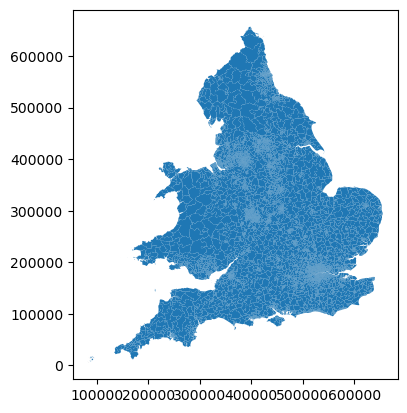

In [18]:
gdf_shapefile.plot()

In [19]:
# gdf_shapefile.explore()
# as im getting unexpected error when i use method .explore() i will try exploring the information with .info() instead  since this one is a standard method provided by the Geopandas library

gdf_shapefile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7264 entries, 0 to 7263
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MSOA21CD  7264 non-null   object  
 1   MSOA21NM  7264 non-null   object  
 2   BNG_E     7264 non-null   int64   
 3   BNG_N     7264 non-null   int64   
 4   LONG      7264 non-null   float64 
 5   LAT       7264 non-null   float64 
 6   GlobalID  7264 non-null   object  
 7   geometry  7264 non-null   geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 454.1+ KB


In [20]:
gdf_wgs84 = gdf_shapefile.to_crs(epsg=4326)

In [21]:
gdf_wgs84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
gdf_wgs84.dtypes

MSOA21CD      object
MSOA21NM      object
BNG_E          int64
BNG_N          int64
LONG         float64
LAT          float64
GlobalID      object
geometry    geometry
dtype: object

Now, we can also create a Dictionary to define which columns we would like to keep in a more curated dataframe

In [23]:
keep_cols = [
    "MSOA21CD",
    "MSOA21NM",
    "geometry",
]
msoa_shp = gdf_wgs84[keep_cols]
msoa_shp.head()

,MSOA21CD,MSOA21NM,geometry
0,E02000001,City of London 001,"POLYGON ((-0.09676 51.52325, -0.09644 51.52282..."
1,E02000002,Barking and Dagenham 001,"POLYGON ((0.14811 51.59678, 0.14809 51.59640, ..."
2,E02000003,Barking and Dagenham 002,"POLYGON ((0.15065 51.58306, 0.14841 51.58075, ..."
3,E02000004,Barking and Dagenham 003,"POLYGON ((0.18511 51.56480, 0.18403 51.56391, ..."
4,E02000005,Barking and Dagenham 004,"POLYGON ((0.14990 51.56807, 0.15078 51.56778, ..."


In [24]:
# msoa_shp.explore()
# # as im getting unexpected error when i use method .explore() i will try exploring the information with .info() instead since this one is a standard method provided by the Geopandas library

msoa_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7264 entries, 0 to 7263
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MSOA21CD  7264 non-null   object  
 1   MSOA21NM  7264 non-null   object  
 2   geometry  7264 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 170.4+ KB


In [25]:
merged_gdf = msoa_shp.merge(house_data, on='MSOA21CD')

In [26]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7264 entries, 0 to 7263
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   MSOA21CD                 7264 non-null   object  
 1   MSOA21NM                 7264 non-null   object  
 2   geometry                 7264 non-null   geometry
 3   2021_MSOA_name           7264 non-null   object  
 4   All_households           7264 non-null   int64   
 5   1Person_household        7264 non-null   int64   
 6   Single family household  7264 non-null   int64   
 7   Other household types    7264 non-null   int64   
dtypes: geometry(1), int64(4), object(3)
memory usage: 510.8+ KB


<AxesSubplot: >

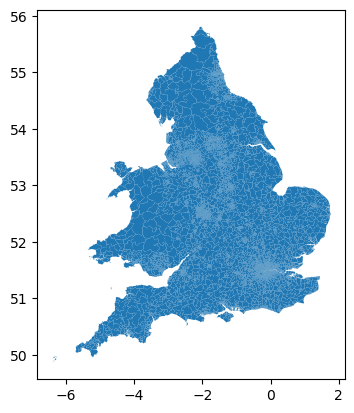

In [27]:
merged_gdf.plot()

<AxesSubplot: >

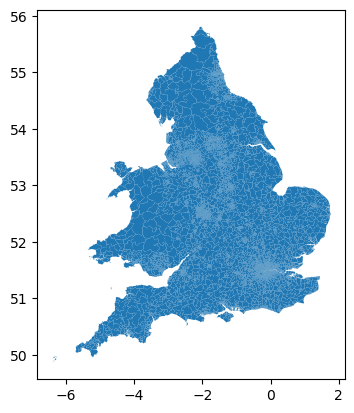

In [30]:
merged_gdf.plot()

<AxesSubplot: >

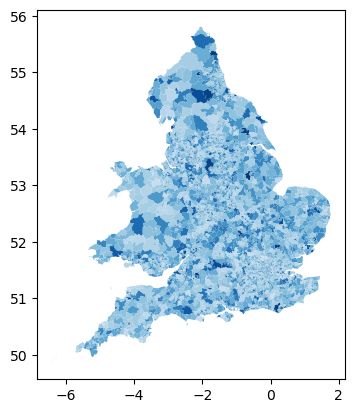

In [31]:
merged_gdf.plot(column='All_households', cmap='Blues')

As you already know, a geo data frame is structured like a regular data frame, with rows being observations and columns being attributes on those observations. The key difference is that a geo data frame has a `geometry` column that contains the spatial coordinates on each record. You can access the `geometry` like you would any column:

In [32]:
#Show the top rows of the geometry column
merged_gdf.geometry.head()

0    POLYGON ((-0.09676 51.52325, -0.09644 51.52282...
1    POLYGON ((0.14811 51.59678, 0.14809 51.59640, ...
2    POLYGON ((0.15065 51.58306, 0.14841 51.58075, ...
3    POLYGON ((0.18511 51.56480, 0.18403 51.56391, ...
4    POLYGON ((0.14990 51.56807, 0.15078 51.56778, ...
Name: geometry, dtype: geometry

In [33]:
pip install leafmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.3 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━

Leafmap is a popular new Python package for interactive mapping and geospatial analysis with minimal coding in a Jupyter environment.  Get more information in its documentation web site: https://leafmap.org/

In [34]:
import leafmap

m = leafmap.Map()
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [35]:
# You can use this handy web map to get the centre of the map, zoom level, and other great resources for web map development 
m = leafmap.Map(center=[54, -1], zoom=6)
m.add_gdf(merged_gdf, layer_name="Housing")
m

Map(center=[54, -1], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

## Creating Spatial Data

Sometimes it is necessary to create a spatial object from scratch, which is most common for point data given that only a single co-ordinate is required for each feature. This can be achieved by building a `GeoDataFrame()` object and is used within this example to create a 311 point dataset. 311 data record non emergency calls within the US, and in this case are those which occurred within San Francisco between January and December 2016. The 311 data used here have been simplified from the [original](https://data.sfgov.org/City-Infrastructure/Case-Data-from-San-Francisco-311-SF311-/vw6y-z8j6/data) data to only a few variables, and those calls without spatial references have been removed.

In [76]:
# Read csv into Python
data_311 = pd.read_csv("311.csv")
# Have a look at the structure
data_311.head()

,CaseID,Category,Lat,Lon
0,6405492,Street Defects,37.822688,-122.363150
1,6590944,Sewer Issues,37.810543,-122.363370
2,5646247,Abandoned Vehicle,37.728618,-122.364671
3,5547584,Graffiti Public Property,37.725278,-122.365803
4,6407484,Street and Sidewalk Cleaning,37.725411,-122.365850


Each spatial object in a geo data frame must be an point, line or polygon. GeoPandas uses spatial object types from the shapely package. In this example we use the `Point` type.

In [77]:
# Create a geo data frame
from shapely.geometry import Point  # import just the Point class from the shapely package
geom = [Point(xy) for xy in zip(data_311.Lon, data_311.Lat)] #create a list of latitude, longitude pairs
SP_311 = gpd.GeoDataFrame(data_311, crs=merged_gdf.crs, geometry=geom)

In [ ]:
# Show the results
SP_311.plot()

## Subsetting Data

It is often necessary to subset data; either restricting a data frame to a set of columns or rows; or in the case of spatial data, creating an extract for a particular set of geographic features. Subsetting can occur in a number of different ways

In [79]:
#Get the frequencies by the categories used within the 311 data
data_311.Category.value_counts()

Category
Street and Sidewalk Cleaning    41683
Graffiti Public Property         9500
Graffiti Private Property        7436
General Requests                 5976
Abandoned Vehicle                5655
Sewer Issues                     2432
Streetlights                     2155
Street Defects                   2146
Damaged Property                 1966
MUNI Feedback                    1928
Sidewalk or Curb                 1822
Tree Maintenance                 1764
Litter Receptacles               1552
Rec and Park Requests            1304
Sign Repair                      1219
Illegal Postings                 1137
Temporary Sign Request           1045
Blocked Street or SideWalk        941
SFHA Requests                     693
Noise Report                      626
Residential Building Request      295
311 External Request              179
Catch Basin Maintenance           161
Color Curb                        146
Interdepartmental Request          90
DPW Volunteer Programs              7
Unp

In [80]:
# Use the loc method to extract rows from the data which relate to Sewer Issues
sewer_issues = data_311.loc[data_311.Category=="Sewer Issues", :]

# Use the square brackets "[]" to perform the same task
sewer_issues = data_311[data_311.Category=="Sewer Issues"]
sewer_issues.head()  #check out the first rows

,CaseID,Category,Lat,Lon
1,6590944,Sewer Issues,37.810543,-122.363370
6,5514170,Sewer Issues,37.810496,-122.366410
30,6434120,Sewer Issues,37.733436,-122.371634
33,6497361,Sewer Issues,37.733436,-122.371634
50,5518467,Sewer Issues,37.731561,-122.373326


In [81]:
# Extract the IDs for the "Sewer Issues"
sewer_issues_IDs = data_311.loc[data_311.Category=="Sewer Issues", "CaseID"]
sewer_issues_IDs.head()  #check out the first elements

1     6590944
6     5514170
30    6434120
33    6497361
50    5518467
Name: CaseID, dtype: int64

Subsetting can also be useful for spatial data. In the example below we can list all the regions in England, and using simple queries we can remove, overwrite, and plot only certain rows inside our initial spatial data frame. For example consider you need to remove an area from your original dataset, and you you the code or value to use for the querie, so you can use something like:

In [82]:
regions_england = gpd.read_file("Regions_(December_2021)/RGN_DEC_2021_EN_BGC.shp")

In [ ]:
regions_england.plot('RGN21NM')

In [84]:
regions_name = regions_england['RGN21NM'].value_counts()
regions_name

RGN21NM
North East                  1
North West                  1
Yorkshire and The Humber    1
East Midlands               1
West Midlands               1
East of England             1
London                      1
South East                  1
South West                  1
Name: count, dtype: int64

In [ ]:
regions_england[regions_england.RGN21NM != "South East"].plot() # Removes South East from the plot

In [ ]:
regions_england[regions_england.RGN21NM == "North East"].plot() # Only plots North East

In [ ]:
regions_england = regions_england[regions_england.RGN21NM != "London"] # Overwrites the regions_england object
regions_england.plot()

## Clipping Spatial Data

Clipping is a process of subsetting using overlapping spatial data. The following code uses the outline of the coast of the U.S. to clip the boundaries of the Census Track Shapefile, another geodata frame object. Note: it is a little slow.

The Census Tracts Shapefile was downloaded from the [SF OpenData](https://data.sfgov.org/Geographic-Locations-and-Boundaries/Census-2010-Tracts-for-San-Francisco/rarb-5ahf/data).

> Note: You will find an error; you should be able to fix it at this level.

In [ ]:
#Read in coastal outline (Source from - https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html)
coast = gpd.read_file("cb_2015_us_county_500k.shp")
SF = gpd.read_file("tl_2010_06075_tract10.shp")

coast_single = coast.unary_union  #merges the US counties into a single object
SF_clipped_geoms = SF.intersection(coast_single) # Clip the SF spatial data frame object to the coastline - just returns geometries
SF_clipped = SF.copy() #make a copy of the SF dataframe
SF_clipped['geometry'] = SF_clipped_geoms #replace the old geometries with the clipped geometries
SF_clipped = SF_clipped[SF_clipped.intersects(SF_clipped_geoms.unary_union)] #subset to just the observations in the clipped area

#Plot the results
SF_clipped.plot()

In [ ]:
SF_single = SF_clipped.unary_union  #merges SF tracts into a single object
SP_311_PIP = SP_311[SP_311.intersects(SF_single)] # Select the 331 points data that intersect with San Francisco
SP_311_PIP.plot()

In [90]:
SP_311_PIP.head()

,CaseID,Category,Lat,Lon,geometry
2,5646247,Abandoned Vehicle,37.728618,-122.364671,POINT (-122.36467 37.72862)
3,5547584,Graffiti Public Property,37.725278,-122.365803,POINT (-122.36580 37.72528)
4,6407484,Street and Sidewalk Cleaning,37.725411,-122.365850,POINT (-122.36585 37.72541)
8,5655235,Street and Sidewalk Cleaning,37.725337,-122.367968,POINT (-122.36797 37.72534)
9,5442879,Street and Sidewalk Cleaning,37.727095,-122.369021,POINT (-122.36902 37.72709)


## Merging Tabular Data

So far you have utilized a single data frame or spatial object; however, it is often the case that in order to generate information, data from multiple sources are required. Where data share a common "key", these can be used to combine / link tables together. This might for example be an identifier for a zone; and is one of the reasons why most statistical agencies adopt a standard set of geographic codes to identify areas.

In the earlier imported data "earnings" this included a UID column which relates to a Tract ID. We can now import an additional data table called bachelors - this also includes the same ID.

In [91]:
#Read CSV file - creates a data frame called earnings
bachelors = pd.read_csv("ACS_14_5YR_S1501_with_ann.csv")
bachelors.head()

#UID - Tract ID
#Bachelor_Higher - Bachelor degree or higher %
#Bachelor_Higher_m - Bachelor degree or higher % (margin of error)

,UID,Bachelor_Higher,Bachelor_Higher_m
0,6075010100,44.3,19.5
1,6075010200,58.8,30.8
2,6075010300,48.8,13.2
3,6075010400,35.9,26.1
4,6075010500,39.2,33.7


Using the matching ID columns on both datasets we can link them together to create a new object with the `merge()` function in pandas:

In [92]:
#Perform the merge
SF_Tract_ACS = pd.merge(earnings, bachelors, left_on="UID", right_on="UID")
SF_Tract_ACS = pd.merge(earnings, bachelors, on="UID") # An alternative method to the above, but a shortened version as the ID columns are the same on both data frames
#there are many more options - for more details type help(pd.merge)

#The combined data frame now looks like
SF_Tract_ACS.head() # shows the top of the data frame

,UID,pop,pop_m,earnings,earnings_m,Bachelor_Higher,Bachelor_Higher_m
0,6075010100,2371,226,49954,15503,44.3,19.5
1,6075010200,2975,315,75984,10892,58.8,30.8
2,6075010300,2748,324,47586,10549,48.8,13.2
3,6075010400,3668,442,48931,6531,35.9,26.1
4,6075010500,1562,198,110076,5331,39.2,33.7


## Removing and Creating Attributes

It is sometimes necessary to remove variables from a tabular object or to create new values. In the following example we will remove some unwanted columns in the SF_clipped object, leaving just the zone id for each polygon.

In [93]:
#Remind yourself what the data look like...
SF_clipped.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,06,075,016500,06075016500,165,Census Tract 165,G5020,S,370459,0,+37.7741958,-122.4477884,"POLYGON ((-122.44478 37.77602, -122.44313 37.7..."
1,06,075,016400,06075016400,164,Census Tract 164,G5020,S,309097,0,+37.7750995,-122.4369729,"POLYGON ((-122.43984 37.77664, -122.43818 37.7..."
2,06,075,016300,06075016300,163,Census Tract 163,G5020,S,245867,0,+37.7760456,-122.4295509,"POLYGON ((-122.42891 37.77804, -122.42808 37.7..."
3,06,075,016100,06075016100,161,Census Tract 161,G5020,S,368901,0,+37.7799831,-122.4286631,"POLYGON ((-122.42915 37.77801, -122.42985 37.7..."
4,06,075,016000,06075016000,160,Census Tract 160,G5020,S,158236,0,+37.7823363,-122.4224838,"POLYGON ((-122.42034 37.78019, -122.42025 37.7..."


In [94]:
SF_clipped = SF_clipped[["GEOID10", "geometry"]] #Makes a new version of the geo data frame with just the values of the GEOID10 and geometry columns

#The data frame within the data slot now looks as follows
SF_clipped.head()

,GEOID10,geometry
0,06075016500,"POLYGON ((-122.44478 37.77602, -122.44313 37.7..."
1,06075016400,"POLYGON ((-122.43984 37.77664, -122.43818 37.7..."
2,06075016300,"POLYGON ((-122.42891 37.77804, -122.42808 37.7..."
3,06075016100,"POLYGON ((-122.42915 37.77801, -122.42985 37.7..."
4,06075016000,"POLYGON ((-122.42034 37.78019, -122.42025 37.7..."


These tract ID are supposed to match with those in the "SF_Tract_ACS" object, however, if you are very observant you will notice that there is one issue; the above have a leading zero.

In [95]:
SF_Tract_ACS.head() # show the top of the SF_Tract_ACS object

,UID,pop,pop_m,earnings,earnings_m,Bachelor_Higher,Bachelor_Higher_m
0,6075010100,2371,226,49954,15503,44.3,19.5
1,6075010200,2975,315,75984,10892,58.8,30.8
2,6075010300,2748,324,47586,10549,48.8,13.2
3,6075010400,3668,442,48931,6531,35.9,26.1
4,6075010500,1562,198,110076,5331,39.2,33.7


As such, in this instance we will create a new column on the SF_Tract_ACS data frame with a new ID that will match the SF GEOID10 column. We can achieve this using the square brackets (`[]`) notation and will call this new variable "GEOID10".

In [96]:
# Creates a new variable with a leading zero
SF_Tract_ACS['GEOID10'] = "0" + SF_Tract_ACS.UID.astype(str) #need to convert the UID column to strings before prepending the zero
SF_Tract_ACS.head()

,UID,pop,pop_m,earnings,earnings_m,Bachelor_Higher,Bachelor_Higher_m,GEOID10
0,6075010100,2371,226,49954,15503,44.3,19.5,06075010100
1,6075010200,2975,315,75984,10892,58.8,30.8,06075010200
2,6075010300,2748,324,47586,10549,48.8,13.2,06075010300
3,6075010400,3668,442,48931,6531,35.9,26.1,06075010400
4,6075010500,1562,198,110076,5331,39.2,33.7,06075010500


If you remember from earlier in this practical, the earnings data had some values that were stored as "objects" rather than floats or integers, and the same is true for both the bachelors data; and now the combined `SF_Tract_ACS` object. We can check this again as follows:

In [97]:
SF_Tract_ACS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UID                197 non-null    int64 
 1   pop                197 non-null    int64 
 2   pop_m              197 non-null    int64 
 3   earnings           197 non-null    object
 4   earnings_m         197 non-null    object
 5   Bachelor_Higher    197 non-null    object
 6   Bachelor_Higher_m  197 non-null    object
 7   GEOID10            197 non-null    object
dtypes: int64(3), object(5)
memory usage: 12.4+ KB


We can also remove the UID column. A quick way of doing this for a single variable is to use the `drop()` method:

In [98]:
SF_Tract_ACS = SF_Tract_ACS.drop('UID', axis=1)  #axis=1 indicates to drop a column (axis=0 is for rows)

We will now convert the object variables to numbers. The first stage will be to remove the "-" and "**" characters from the variables with the `replace` function, replacing these with NA values.

In [99]:
#Replace the "-" and "*" characters
import numpy as np
SF_Tract_ACS.loc[SF_Tract_ACS.earnings=='-', 'earnings'] = np.nan #replace the "-" values with NA
SF_Tract_ACS.loc[SF_Tract_ACS.earnings_m=='**', 'earnings_m'] = np.nan #replace the "**" values with NA
SF_Tract_ACS.loc[SF_Tract_ACS.Bachelor_Higher=='-', 'Bachelor_Higher'] = np.nan #replace the "-" values with NA
SF_Tract_ACS.loc[SF_Tract_ACS.Bachelor_Higher_m=='**', 'Bachelor_Higher_m'] = np.nan #replace the "-" values with NA

We will now convert these to numeric values:

In [102]:
SF_Tract_ACS.earnings = SF_Tract_ACS.earnings.astype(float)
SF_Tract_ACS.earnings_m = SF_Tract_ACS.earnings_m.astype(float)
SF_Tract_ACS.Bachelor_Higher = SF_Tract_ACS.Bachelor_Higher.astype(float)
SF_Tract_ACS.Bachelor_Higher_m = SF_Tract_ACS.Bachelor_Higher_m.astype(float)

In [103]:
SF_Tract_ACS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pop                197 non-null    int64  
 1   pop_m              197 non-null    int64  
 2   earnings           195 non-null    float64
 3   earnings_m         195 non-null    float64
 4   Bachelor_Higher    194 non-null    float64
 5   Bachelor_Higher_m  194 non-null    float64
 6   GEOID10            197 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 10.9+ KB


Now all the variables other than the "GEOID10" are stored as integers or floats:

## Merging Spatial Data

It is also possible to join tabular data onto a spatial object (e.g. a geo data frame) in the same way as with regular data frames. In this example, we will join the newly created `SF_Tract_ACS` data onto the `SF_clipped` data frame.

In [104]:
SF_clipped = pd.merge(SF_clipped, SF_Tract_ACS, on="GEOID10") # merge
SF_clipped.head() #show the attribute data

,GEOID10,geometry,pop,pop_m,earnings,earnings_m,Bachelor_Higher,Bachelor_Higher_m
0,06075016500,"POLYGON ((-122.44478 37.77602, -122.44313 37.7...",3973,428,50901.0,10181.0,25.7,17.2
1,06075016400,"POLYGON ((-122.43984 37.77664, -122.43818 37.7...",3076,249,52870.0,7839.0,56.7,22.3
2,06075016300,"POLYGON ((-122.42891 37.77804, -122.42808 37.7...",3907,853,40522.0,11269.0,63.2,23.9
3,06075016100,"POLYGON ((-122.42915 37.77801, -122.42985 37.7...",2247,388,23906.0,8405.0,50.2,22.7
4,06075016000,"POLYGON ((-122.42034 37.78019, -122.42025 37.7...",1670,247,59583.0,15262.0,70.8,27.2


## Spatial Joins

Earlier in this practical we created a geo data frame which we later cropped using the `intersects()` method to create the `SP_311_PIP` object. As a reminder of what this looks like it is plotted below:

In [105]:
# SP_311_PIP.explore(tiles="CartoDB positron")

In [ ]:
SP_311_PIP.plot()

We will now clean up the associated data frame by removing all of the attributes apart from the category and geometry.

In [107]:
SP_311_PIP = SP_311_PIP[["Category", "geometry"]] #subset data
SP_311_PIP.head()

,Category,geometry
2,Abandoned Vehicle,POINT (-122.36467 37.72862)
3,Graffiti Public Property,POINT (-122.36580 37.72528)
4,Street and Sidewalk Cleaning,POINT (-122.36585 37.72541)
8,Street and Sidewalk Cleaning,POINT (-122.36797 37.72534)
9,Street and Sidewalk Cleaning,POINT (-122.36902 37.72709)


The `intersects()` method was used to clip a dataset to an extent earlier, essentially a [point in polygon](https://en.wikipedia.org/wiki/Point_in_polygon) function. In contrast, the spatial join (`sjoin()`) function performs the point in polygon action and has a really useful feature that it also appends the attributes of the polygon to the point. For example, we might be interested in finding out which census tracts each of the 311 calls resides within. As such, we will implement another point in polygon analysis to create a new object `SF_clipped_311`:

In [108]:
SF_clipped_311 = gpd.sjoin(SP_311_PIP, SF, how='inner') # point in polygon
#Cleanup the attributes
SF_clipped_311 = SF_clipped_311[["GEOID10","Category","geometry"]]
#Show the top rows of the data
SF_clipped_311.head()

,GEOID10,Category,geometry
2,06075980600,Abandoned Vehicle,POINT (-122.36467 37.72862)
3,06075980600,Graffiti Public Property,POINT (-122.36580 37.72528)
4,06075980600,Street and Sidewalk Cleaning,POINT (-122.36585 37.72541)
8,06075980600,Street and Sidewalk Cleaning,POINT (-122.36797 37.72534)
9,06075980600,Street and Sidewalk Cleaning,POINT (-122.36902 37.72709)


## Writing and saving your processed data

In order to share data it is often useful to write data frames or spatial objects back out of Python as external files. This is very simple, and Python supports multiple formats. In these examples, a CSV file and a Shapefile are both created.

In [109]:
#In this example, we write out a CSV file with the geo data frame SF_clipped_311
SF_clipped_311.to_csv("311_Tract_Coded.csv")

This has created a CSV file "311_Tract_Coded.csv" in your working directory; we will use this in the next practical class - "Basic SQL".

It is also possible to write out a Shapefile

In [110]:
#This will write out a Shapefile for San Francisco - note, as the column names are a little longer than are allowed within a Shapefile and as such are automatically shortened.
SF_clipped.to_file("SF_clipped.shp") #the default is Shapefile, but other spatial formats are supported

# Working with Web Services

Nowadays, you have access to spatial and numerical data from multiple data sources; many great spatial data sources will include another type of access that isn't often very popular among the spatial data scientist communities, as we tend to use downloaded data to make any analysis. We consider that only through downloaded data will we be able to work more efficiently. Somehow, those caveats are true. However, we also need to consider the rapid improvement in computational capabilities, the use of the Web and Cloud GIS services, and take advantage of the faster internet connections we can access nowadays. As you probably already know, spatial data come in multiple formats, whether the type of data we need to store or the natural phenomena we try to represent; numerous types of spatial web services serve various purposes. 

To get to that point, if we work with a window-interface tool like QGIS or ArcGIS, the connection to the spatial data is usually established on local directories; depending on the type of project, you might need to work using a direct connection to a particular spatial database. However, in this example, I will show you how to use web services, in particular spatial web services, to get some numerical and spatial data, load that into your computer memory, process the information and then get the outcomes you can later include as an outcome of any spatial analysis.

Generally, you can think of a web service as a piece of software designed to allow the interaction and communication between different applications over the internet. That is the keystone! You know that the transmission of your data goes through the internet, which means that a web service enables the exchange of data and, in many cases, also functionality between multiple systems, allowing them to work together seamlessly. 

Web services use standard web protocols, such as HTTP, and often communicate using formats like XML or JSON. They enable interoperability, scalability, and integration in distributed computing environments.

## Web Services in Urban Analytics:

In urban analytics, web services facilitate the seamless exchange and analysis of geospatial data, which is vital for understanding and managing urban environments. Spatial Web services provide a platform for sharing geographic information, conducting spatial studies, and delivering real-time data to support urban planning, transportation management, environmental monitoring, and more decision-making processes.

## Common Spatial Web Services:

Having spatial web services standards is extremely important., the standards are the glue to geospatial information interoperability, and are used by thousands of organizations across the globe and represented in millions of lines of code. They are backed by international organizations, used in proposals, and implemented to speed up the process of innovation. If you want to explore all the geospatial standands, take a look at the OGC web https://www.ogc.org/standards/ IN the following section I will describe the most common spatial web services you migth find when you work with spatial data. 

### Web Map Services (WMS):

A WMS services is a standard protocol for serving georeferenced **map images** over the web. It allows clients to request maps from a server, which then generates and returns the map images.

### Web Feature Services (WFS):

A WFS service is a standard for serving and exchanging **vector** data over the web. It enables clients to request and retrieve features (geospatial entities) from a server, supporting more complex data interactions compared to WMS, including the editing and symbology capabilites.

### GeoJSON/JSON Web Services:

These web services use the JSON format to transmit geospatial data. They are often employed for simple and lightweight data exchange, suitable for web applications and APIs. These web services are popular for transmitting spatial data between clients and servers due to their simplicity and human-readability.

### RESTful APIs (Representational State Transfer):

RESTful APIs follow the principles of REST architecture, providing a set of rules for building web services. They use standard **HTTP methods (GET, POST, PUT, DELETE)** for data manipulation and are often implemented in the form of web APIs. APIs are versatile and widely adopted in numerous geospatial applications and are widely implemented allowing developers to access, manipulate, and retrieve geographic data programmatically.

### APIs

Application Programming Interface (APIs) represent a 'gate' or otherwise a platform that enables a client (that is you) to interact with a server (for example [Glasgow Open Data](https://developer.glasgow.gov.uk/),  [opendata.bristol.gov.uk](https://opendata.bristol.gov.uk/)). 

According to @amazonWhatAPI:
> In the context of APIs, the word Application refers to any software with a distinct function. Interface can be thought of as a contract of service between two applications. This contract defines how the two communicate with each other using requests and responses. Their API documentation contains information on how developers are to structure those requests and responses.

The client's software (this might be R pr Python for example) sends a request to the server requesting specific data. The response is the data the client asked.

More commonly, the client might be a mobile phone app (e.g. train network status app) and the server is the network operator's server.

APIs can be private or public types. For more inthe description from @amazonWhatAPI [here](https://aws.amazon.com/what-is/api/#:~:text=API%20stands%20for%20Application%20Programming,other%20using%20requests%20and%20responses.)

In the following example, we will use the Glasglow Open Data API to fetch data from the bike rentals.
1. Please go to https://developer.glasgow.gov.uk/
2. Sign Up and explore the available APIs
3. Go to https://developer.glasgow.gov.uk/api-details#api=mobility&operation=get-getrentals and explore the available parameters to fetch data from the Bike Rentals in Glasgow.
4. To your right, you will see a tiny green button, **Try it**, where you can play with the API requests and see if you can get an appropriate response for the last 3 weeks of data. Help: Just add the parameter `3_weeks_ago` in the Value box and then click on the **Send** button to see how the API responds. This is what we will apply but using python to write some analysis. 

In [36]:
import requests
import pandas as pd
import geopandas as gpd

# Let's describe the url, it is usually easier to do it like this, so in the future, you can easily update the URL
url_bikes = "https://api.glasgow.gov.uk/mobility/v1/get_rentals?startDate=2022-05-01&endDate=2023-05-01"
# Making the query to the web server, using the Get method from the requests library 
response = requests.get(url_bikes)
response

<Response [200]>

You see the response has a 200 code, which means the request as satisfactory, here the possible other codes you can get and hence you can see if your code has any issue. https://www.w3schools.com/tags/ref_httpmessages.asp

In [37]:
#Now we get the response from the web server, we need to translate that into a format we can manipulate, like JSON.
data = response.json()
data
# careful here you will get a huge outcome; explore what you get, and then you can clear this cell outcome

{'metadata': {'pageSize': 10000, 'page': 1, 'hasNextPage': True},
 'data': [{'created': '2022-10-21T13:09:57.926Z',
   'updated': '2022-10-21T13:09:57.926Z',
   'cityId': '237',
   'bikeId': '116870',
   'startDate': '2022-05-01T00:01:40Z',
   'startPlaceId': '264299',
   'startPlaceCityId': '237',
   'startPlaceName': 'ELECTRIC - Broomielaw',
   'startPlaceStationNumber': 8413,
   'startPlaceLat': 55.8565998,
   'startPlaceLong': -4.26352143,
   'startChannelId': None,
   'endDate': '2022-05-01T00:02:36Z',
   'endPlaceId': '264299',
   'endPlaceCityId': '237',
   'endChannelId': '381',
   'endPlaceName': 'ELECTRIC - Broomielaw',
   'endPlaceStationNumber': 8413,
   'endPlaceLat': 55.8565998,
   'endPlaceLong': -4.26352143,
   'durationSeconds': 56,
   'isInvalid': False,
   'price': 2.0,
   'isEbike': True},
  {'created': '2022-10-21T13:09:57.975Z',
   'updated': '2022-10-21T13:09:57.975Z',
   'cityId': '237',
   'bikeId': '143384',
   'startDate': '2022-05-01T00:04:17Z',
   'startPla

In [38]:
# Usually, there are two labels into the web server response the metadata, and the data; we will use the data label
# to get all attributes included. 
rental_data = data['data']
rental_data
# See the structure of the data, you can see
# 'attribute':'value' structure
# each {} define one row or one element
# Again, here you will get a huge outcome; just explore what you get, and then you can clear this cell outcome

[{'created': '2022-10-21T13:09:57.926Z',
  'updated': '2022-10-21T13:09:57.926Z',
  'cityId': '237',
  'bikeId': '116870',
  'startDate': '2022-05-01T00:01:40Z',
  'startPlaceId': '264299',
  'startPlaceCityId': '237',
  'startPlaceName': 'ELECTRIC - Broomielaw',
  'startPlaceStationNumber': 8413,
  'startPlaceLat': 55.8565998,
  'startPlaceLong': -4.26352143,
  'startChannelId': None,
  'endDate': '2022-05-01T00:02:36Z',
  'endPlaceId': '264299',
  'endPlaceCityId': '237',
  'endChannelId': '381',
  'endPlaceName': 'ELECTRIC - Broomielaw',
  'endPlaceStationNumber': 8413,
  'endPlaceLat': 55.8565998,
  'endPlaceLong': -4.26352143,
  'durationSeconds': 56,
  'isInvalid': False,
  'price': 2.0,
  'isEbike': True},
 {'created': '2022-10-21T13:09:57.975Z',
  'updated': '2022-10-21T13:09:57.975Z',
  'cityId': '237',
  'bikeId': '143384',
  'startDate': '2022-05-01T00:04:17Z',
  'startPlaceId': '28521547',
  'startPlaceCityId': '237',
  'startPlaceName': 'King Street South',
  'startPlaceSt

In [39]:
rental_pd = pd.DataFrame(rental_data)
#Can you guess what we are doing here?
rental_pd.head()

,created,updated,cityId,bikeId,startDate,startPlaceId,startPlaceCityId,startPlaceName,startPlaceStationNumber,startPlaceLat,startPlaceLong,startChannelId,endDate,endPlaceId,endPlaceCityId,endChannelId,endPlaceName,endPlaceStationNumber,endPlaceLat,endPlaceLong,durationSeconds,isInvalid,price,isEbike
0,2022-10-21T13:09:57.926Z,2022-10-21T13:09:57.926Z,237,116870,2022-05-01T00:01:40Z,264299,237,ELECTRIC - Broomielaw,8413.0,55.856600,-4.263521,None,2022-05-01T00:02:36Z,264299,237,381,ELECTRIC - Broomielaw,8413.0,55.856600,-4.263521,56,False,2.0,True
1,2022-10-21T13:09:57.975Z,2022-10-21T13:09:57.975Z,237,143384,2022-05-01T00:04:17Z,28521547,237,King Street South,8230.0,55.855860,-4.246950,None,2022-05-01T00:22:34Z,3812776,237,381,Alexandra Park (south entrance) Alexandra Para...,8457.0,55.863128,-4.210282,1097,False,1.0,False
2,2022-10-21T13:09:58.026Z,2022-10-21T13:09:58.026Z,237,129744,2022-05-01T00:04:24Z,266171,237,University of Glasgow (East) - ELECTRIC,8435.0,55.871763,-4.278070,None,2022-05-01T00:10:08Z,264302,237,381,Botanic Gardens - ELECTRIC,8417.0,55.878278,-4.288487,344,False,1.0,False
3,2022-10-21T13:09:58.076Z,2022-10-21T13:09:58.076Z,237,143168,2022-05-01T00:04:29Z,349455,237,ELECTRIC - Cessnock Subway Station,8444.0,55.851918,-4.294490,None,2022-05-01T02:57:49Z,349455,237,381,ELECTRIC - Cessnock Subway Station,8444.0,55.851918,-4.294490,10400,False,6.0,False
4,2022-10-21T13:09:58.126Z,2022-10-21T13:09:58.126Z,237,143248,2022-05-01T00:04:40Z,349455,237,ELECTRIC - Cessnock Subway Station,8444.0,55.851918,-4.294490,None,2022-05-01T01:21:31Z,264295,237,381,ELECTRIC - St Enoch Square,8410.0,55.856829,-4.255292,4611,False,3.0,False


In [5]:
rental_pd.shape

(10000, 24)

In [40]:
rental_pd.columns

Index(['created', 'updated', 'cityId', 'bikeId', 'startDate', 'startPlaceId',
       'startPlaceCityId', 'startPlaceName', 'startPlaceStationNumber',
       'startPlaceLat', 'startPlaceLong', 'startChannelId', 'endDate',
       'endPlaceId', 'endPlaceCityId', 'endChannelId', 'endPlaceName',
       'endPlaceStationNumber', 'endPlaceLat', 'endPlaceLong',
       'durationSeconds', 'isInvalid', 'price', 'isEbike'],
      dtype='object')

In [41]:
# Check for NaN in the coordinates column
nan_in_column_Lat = rental_pd['startPlaceLat'].isna().any()
nan_in_column_Long = rental_pd['startPlaceLong'].isna().any()

print(nan_in_column_Lat,nan_in_column_Lat)

# Alternatively, you can use the following to count NaN values
nan_in_column_Lat = rental_pd['startPlaceLat'].isna().sum()
nan_in_column_Long = rental_pd['startPlaceLong'].isna().sum()
print(nan_in_column_Lat,nan_in_column_Lat)

True True
33 33


In [42]:
clean_rental_pd = rental_pd.dropna(subset=['startPlaceLat', 'startPlaceLong', 'endPlaceLat','endPlaceLong'])
clean_rental_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created                  9940 non-null   object 
 1   updated                  9940 non-null   object 
 2   cityId                   9940 non-null   object 
 3   bikeId                   9940 non-null   object 
 4   startDate                9940 non-null   object 
 5   startPlaceId             9940 non-null   object 
 6   startPlaceCityId         9940 non-null   object 
 7   startPlaceName           9940 non-null   object 
 8   startPlaceStationNumber  9555 non-null   float64
 9   startPlaceLat            9940 non-null   float64
 10  startPlaceLong           9940 non-null   float64
 11  startChannelId           0 non-null      object 
 12  endDate                  9940 non-null   object 
 13  endPlaceId               9940 non-null   object 
 14  endPlaceCityId          

Now, using the GeoPandas Documentation site, we can see how to build a Geodataframe using the Lat and Long attributes. This dataset includes two sets of coordinates, one for when the user gets the bike and another one for when the user returns the bike. 

https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html


In [43]:
gdf_bikes_start = gpd.GeoDataFrame(clean_rental_pd, geometry=gpd.points_from_xy(clean_rental_pd['startPlaceLong'], clean_rental_pd['startPlaceLat']))
#gdf_bikes_end = gpd.GeoDataFrame(clean_rental_pd, geometry=gpd.points_from_xy(clean_rental_pd['endPlaceLong'], clean_rental_pd['endPlaceLat']))

# Print the GeoDataFrame
gdf_bikes_start.info()
# Do we need all those columns? And you see, there is also a lot of pre-processing to do with all the object Dtype

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9940 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   created                  9940 non-null   object  
 1   updated                  9940 non-null   object  
 2   cityId                   9940 non-null   object  
 3   bikeId                   9940 non-null   object  
 4   startDate                9940 non-null   object  
 5   startPlaceId             9940 non-null   object  
 6   startPlaceCityId         9940 non-null   object  
 7   startPlaceName           9940 non-null   object  
 8   startPlaceStationNumber  9555 non-null   float64 
 9   startPlaceLat            9940 non-null   float64 
 10  startPlaceLong           9940 non-null   float64 
 11  startChannelId           0 non-null      object  
 12  endDate                  9940 non-null   object  
 13  endPlaceId               9940 non-null   object  
 14  

Let's plot one of the GeoPandasDataFrame

<AxesSubplot: >

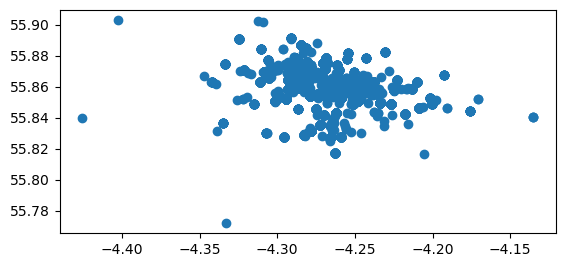

In [44]:
gdf_bikes_start.plot()

What is wrong with the previous map? why the points arent well located? 

In [45]:
gdf_bikes_start.crs

You see what the problem is?, let me fix that...

In [46]:
gdf_bikes_start = gdf_bikes_start.set_crs("EPSG:4326")

<AxesSubplot: >

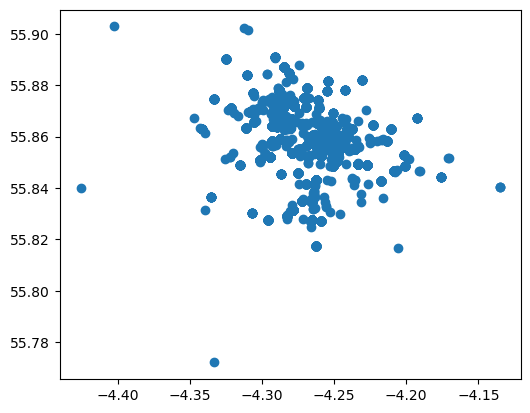

In [49]:
gdf_bikes_start.plot()

You could have fixed that problem from the moment you created the GeoPandasDataFrame, just follow the example included in the documentation link: https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

In [50]:
gdf_bikes_start.dtypes

created                      object
updated                      object
cityId                       object
bikeId                       object
startDate                    object
startPlaceId                 object
startPlaceCityId             object
startPlaceName               object
startPlaceStationNumber     float64
startPlaceLat               float64
startPlaceLong              float64
startChannelId               object
endDate                      object
endPlaceId                   object
endPlaceCityId               object
endChannelId                 object
endPlaceName                 object
endPlaceStationNumber       float64
endPlaceLat                 float64
endPlaceLong                float64
durationSeconds               int64
isInvalid                      bool
price                       float64
isEbike                        bool
geometry                   geometry
dtype: object

In [51]:
keep_cols = [
    "startDate",
    "startPlaceId",
    "startPlaceName",
    "durationSeconds",
    "isInvalid",
    "price",
    "isEbike",
    "startPlaceLat",
    "startPlaceLong",
    "geometry",
]
gdf_bikes_start = gdf_bikes_start[keep_cols]
gdf_bikes_start.head()

,startDate,startPlaceId,startPlaceName,durationSeconds,isInvalid,price,isEbike,startPlaceLat,startPlaceLong,geometry
0,2022-05-01T00:01:40Z,264299,ELECTRIC - Broomielaw,56,False,2.0,True,55.856600,-4.263521,POINT (-4.26352 55.85660)
1,2022-05-01T00:04:17Z,28521547,King Street South,1097,False,1.0,False,55.855860,-4.246950,POINT (-4.24695 55.85586)
2,2022-05-01T00:04:24Z,266171,University of Glasgow (East) - ELECTRIC,344,False,1.0,False,55.871763,-4.278070,POINT (-4.27807 55.87176)
3,2022-05-01T00:04:29Z,349455,ELECTRIC - Cessnock Subway Station,10400,False,6.0,False,55.851918,-4.294490,POINT (-4.29449 55.85192)
4,2022-05-01T00:04:40Z,349455,ELECTRIC - Cessnock Subway Station,4611,False,3.0,False,55.851918,-4.294490,POINT (-4.29449 55.85192)


In [52]:
gdf_bikes_start.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9940 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   startDate        9940 non-null   object  
 1   startPlaceId     9940 non-null   object  
 2   startPlaceName   9940 non-null   object  
 3   durationSeconds  9940 non-null   int64   
 4   isInvalid        9940 non-null   bool    
 5   price            9940 non-null   float64 
 6   isEbike          9940 non-null   bool    
 7   startPlaceLat    9940 non-null   float64 
 8   startPlaceLong   9940 non-null   float64 
 9   geometry         9940 non-null   geometry
dtypes: bool(2), float64(3), geometry(1), int64(1), object(3)
memory usage: 718.3+ KB


Updating the requiered and more appropiated Dtypes for the remainng columns

In [53]:
gdf_bikes_start.startPlaceId = gdf_bikes_start.startPlaceId.astype(int)
gdf_bikes_start.startPlaceName = gdf_bikes_start.startPlaceName.astype(str)
gdf_bikes_start['startDate'] = pd.to_datetime(gdf_bikes_start['startDate'], format='%Y-%m-%dT%H:%M:%SZ')

In [54]:
gdf_bikes_start.dtypes
#gdf_bikes_start['startPlaceName'].unique()

startDate          datetime64[ns]
startPlaceId                int64
startPlaceName             object
durationSeconds             int64
isInvalid                    bool
price                     float64
isEbike                      bool
startPlaceLat             float64
startPlaceLong            float64
geometry                 geometry
dtype: object

In [55]:
gdf_bikes_start.head()

,startDate,startPlaceId,startPlaceName,durationSeconds,isInvalid,price,isEbike,startPlaceLat,startPlaceLong,geometry
0,2022-05-01 00:01:40,264299,ELECTRIC - Broomielaw,56,False,2.0,True,55.856600,-4.263521,POINT (-4.26352 55.85660)
1,2022-05-01 00:04:17,28521547,King Street South,1097,False,1.0,False,55.855860,-4.246950,POINT (-4.24695 55.85586)
2,2022-05-01 00:04:24,266171,University of Glasgow (East) - ELECTRIC,344,False,1.0,False,55.871763,-4.278070,POINT (-4.27807 55.87176)
3,2022-05-01 00:04:29,349455,ELECTRIC - Cessnock Subway Station,10400,False,6.0,False,55.851918,-4.294490,POINT (-4.29449 55.85192)
4,2022-05-01 00:04:40,349455,ELECTRIC - Cessnock Subway Station,4611,False,3.0,False,55.851918,-4.294490,POINT (-4.29449 55.85192)


Now, we want to see where the more dense areas are and where the bikes get collected so that we will use a simple but straightforward cluster analysis. We will explore this in more detail later in this course; for now, let's apply an ML library in Python sklearn (https://scikit-learn.org/stable/index.html) and define only 4 cluster areas. We will use the geometry attribute to get our Lat and Long values, which are required for the sklearn library fit_predict method.

Before that, let's explore how we get the Lat and the Long values in the way the cluster method requires.


In [56]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans_collection = KMeans(n_clusters=num_clusters, random_state=42)
gdf_bikes_start['kmeanscluster'] = kmeans_collection.fit_predict(gdf_bikes_start[['startPlaceLong', 'startPlaceLat']])

In [57]:
gdf_bikes_start.head()

,startDate,startPlaceId,startPlaceName,durationSeconds,isInvalid,price,isEbike,startPlaceLat,startPlaceLong,geometry,kmeanscluster
0,2022-05-01 00:01:40,264299,ELECTRIC - Broomielaw,56,False,2.0,True,55.856600,-4.263521,POINT (-4.26352 55.85660),1
1,2022-05-01 00:04:17,28521547,King Street South,1097,False,1.0,False,55.855860,-4.246950,POINT (-4.24695 55.85586),1
2,2022-05-01 00:04:24,266171,University of Glasgow (East) - ELECTRIC,344,False,1.0,False,55.871763,-4.278070,POINT (-4.27807 55.87176),2
3,2022-05-01 00:04:29,349455,ELECTRIC - Cessnock Subway Station,10400,False,6.0,False,55.851918,-4.294490,POINT (-4.29449 55.85192),2
4,2022-05-01 00:04:40,349455,ELECTRIC - Cessnock Subway Station,4611,False,3.0,False,55.851918,-4.294490,POINT (-4.29449 55.85192),2


<AxesSubplot: >

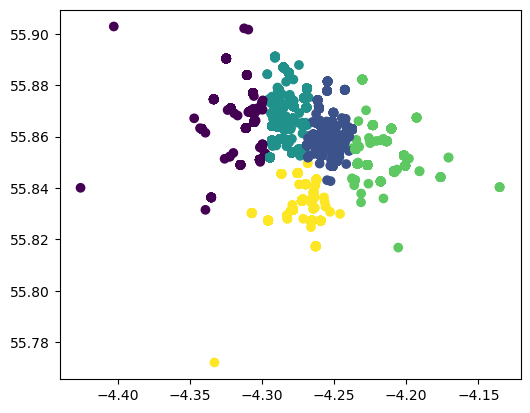

In [63]:
gdf_bikes_start.plot(column='kmeanscluster')

# Challenge No 2:

**Part No 1:**

1. Using the same workflow previously described, now calculate the clustered areas for the GeoPandasDataFrame `gdf_bikes_end`
2. Make sure you don't have any NaN in your columns, add a CRS, clean up the unnecessary attributes, calculate the cluster values, and plot a map of 4 calculated clusters for the return locations.

**Part No 2:**

1. Using the Glasglow Open Data API ( Transit) https://developer.glasgow.gov.uk/api-details#api=traffic&operation=traffic-sensor-locations fetch all the sensor locations in the city.
2. Map the sensor
3. Find the WorkingZones and Calculate/Map the areas with more and fewer sensors distributed in the city.
4. You will need:
   * Get two separate Geopandas DataFrames, one for the traffic sensors and another one for the WorkingZones.
   * Using `sJoin` ( Spatial Join) https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html
   calculate the overlay of sensors and polygons.
   * Using group_by https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html to count the number of sensors per WorkingZone
   * Make sure you add the counts into the WorkingZone polygons of Glasgow so you can create a map of Zones with more and fewer traffic sensors.
   * Of course, you will need extra steps where you manipulate the data and extract what you need, for instance, clipping the Working Zones only for Glasgow.
5. Make sure you comment on your code and describe how you are manipulating the data.


In [135]:
# Part No 1:

# 1. Using the same workflow previously described, now calculate the clustered areas for the GeoPandasDataFrame gdf_bikes_end
# 2. Make sure you don't have any NaN in your columns, add a CRS, clean up the unnecessary attributes, calculate the cluster values, and plot a map of 4 calculated clusters for the return locations.
# Print the GeoDataFrame
gdf_bikes_end = gpd.GeoDataFrame(clean_rental_pd, geometry=gpd.points_from_xy(clean_rental_pd['endPlaceLong'], clean_rental_pd['endPlaceLat']))

gdf_bikes_end.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 9940 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   created                  9940 non-null   object  
 1   updated                  9940 non-null   object  
 2   cityId                   9940 non-null   object  
 3   bikeId                   9940 non-null   object  
 4   startDate                9940 non-null   object  
 5   startPlaceId             9940 non-null   object  
 6   startPlaceCityId         9940 non-null   object  
 7   startPlaceName           9940 non-null   object  
 8   startPlaceStationNumber  9555 non-null   float64 
 9   startPlaceLat            9940 non-null   float64 
 10  startPlaceLong           9940 non-null   float64 
 11  startChannelId           0 non-null      object  
 12  endDate                  9940 non-null   object  
 13  endPlaceId               9940 non-null   object  
 14  endPl

In [136]:
gdf_bikes_end = gdf_bikes_end.set_crs("EPSG:4326")

In [ ]:
gdf_bikes_end.plot()

In [ ]:
gdf_bikes_end.dtypes

In [138]:
keep_cols_end = [
    "endDate",
    "endPlaceId",
    "endPlaceName",
    "durationSeconds",
    "isInvalid",
    "price",
    "isEbike",
    "endPlaceLat",
    "endPlaceLong",
    "geometry"
]
gdf_bikes_end = gdf_bikes_end[keep_cols_end]
gdf_bikes_end.head()


,endDate,endPlaceId,endPlaceName,durationSeconds,isInvalid,price,isEbike,endPlaceLat,endPlaceLong,geometry
0,2022-05-01T00:02:36Z,264299,ELECTRIC - Broomielaw,56,False,2.0,True,55.856600,-4.263521,POINT (-4.26352 55.85660)
1,2022-05-01T00:22:34Z,3812776,Alexandra Park (south entrance) Alexandra Para...,1097,False,1.0,False,55.863128,-4.210282,POINT (-4.21028 55.86313)
2,2022-05-01T00:10:08Z,264302,Botanic Gardens - ELECTRIC,344,False,1.0,False,55.878278,-4.288487,POINT (-4.28849 55.87828)
3,2022-05-01T02:57:49Z,349455,ELECTRIC - Cessnock Subway Station,10400,False,6.0,False,55.851918,-4.294490,POINT (-4.29449 55.85192)
4,2022-05-01T01:21:31Z,264295,ELECTRIC - St Enoch Square,4611,False,3.0,False,55.856829,-4.255292,POINT (-4.25529 55.85683)


In [139]:
gdf_bikes_end.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 9940 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   endDate          9940 non-null   object  
 1   endPlaceId       9940 non-null   object  
 2   endPlaceName     9940 non-null   object  
 3   durationSeconds  9940 non-null   int64   
 4   isInvalid        9940 non-null   bool    
 5   price            9940 non-null   float64 
 6   isEbike          9940 non-null   bool    
 7   endPlaceLat      9940 non-null   float64 
 8   endPlaceLong     9940 non-null   float64 
 9   geometry         9940 non-null   geometry
dtypes: bool(2), float64(3), geometry(1), int64(1), object(3)
memory usage: 718.3+ KB


In [140]:

gdf_bikes_end.endPlaceId = gdf_bikes_end.endPlaceId.astype(int)
gdf_bikes_end.endPlaceName = gdf_bikes_end.endPlaceName.astype(str)
gdf_bikes_end['endDate'] = pd.to_datetime(gdf_bikes_end['endDate'], format='%Y-%m-%dT%H:%M:%SZ')

In [141]:
gdf_bikes_end.dtypes
#gdf_bikes_end['startPlaceName'].unique()

endDate            datetime64[ns]
endPlaceId                  int64
endPlaceName               object
durationSeconds             int64
isInvalid                    bool
price                     float64
isEbike                      bool
endPlaceLat               float64
endPlaceLong              float64
geometry                 geometry
dtype: object

In [142]:
gdf_bikes_end.head()

,endDate,endPlaceId,endPlaceName,durationSeconds,isInvalid,price,isEbike,endPlaceLat,endPlaceLong,geometry
0,2022-05-01 00:02:36,264299,ELECTRIC - Broomielaw,56,False,2.0,True,55.856600,-4.263521,POINT (-4.26352 55.85660)
1,2022-05-01 00:22:34,3812776,Alexandra Park (south entrance) Alexandra Para...,1097,False,1.0,False,55.863128,-4.210282,POINT (-4.21028 55.86313)
2,2022-05-01 00:10:08,264302,Botanic Gardens - ELECTRIC,344,False,1.0,False,55.878278,-4.288487,POINT (-4.28849 55.87828)
3,2022-05-01 02:57:49,349455,ELECTRIC - Cessnock Subway Station,10400,False,6.0,False,55.851918,-4.294490,POINT (-4.29449 55.85192)
4,2022-05-01 01:21:31,264295,ELECTRIC - St Enoch Square,4611,False,3.0,False,55.856829,-4.255292,POINT (-4.25529 55.85683)


In [143]:
from sklearn.cluster import KMeans
num_clusters = 4

kmeans_collection = KMeans(n_clusters=num_clusters, random_state=42)
gdf_bikes_end['kmeans_cluster'] = kmeans_collection.fit_predict(gdf_bikes_end[['endPlaceLong', 'endPlaceLat']])

In [144]:
gdf_bikes_end.head()

,endDate,endPlaceId,endPlaceName,durationSeconds,isInvalid,price,isEbike,endPlaceLat,endPlaceLong,geometry,kmeans_cluster
0,2022-05-01 00:02:36,264299,ELECTRIC - Broomielaw,56,False,2.0,True,55.856600,-4.263521,POINT (-4.26352 55.85660),3
1,2022-05-01 00:22:34,3812776,Alexandra Park (south entrance) Alexandra Para...,1097,False,1.0,False,55.863128,-4.210282,POINT (-4.21028 55.86313),0
2,2022-05-01 00:10:08,264302,Botanic Gardens - ELECTRIC,344,False,1.0,False,55.878278,-4.288487,POINT (-4.28849 55.87828),1
3,2022-05-01 02:57:49,349455,ELECTRIC - Cessnock Subway Station,10400,False,6.0,False,55.851918,-4.294490,POINT (-4.29449 55.85192),1
4,2022-05-01 01:21:31,264295,ELECTRIC - St Enoch Square,4611,False,3.0,False,55.856829,-4.255292,POINT (-4.25529 55.85683),3


In [78]:
# Part No 2:

# 1. Using the Glasglow Open Data API ( Transit) https://developer.glasgow.gov.uk/api-details#api=traffic&operation=traffic-sensor-locations fetch all the sensor locations in the city.
# 2. Map the sensor

import requests
import pandas as pd
import geopandas as gpd

# Let's describe the url, it is usually easier to do it like this, so in the future, you can easily update the URL
traffic_sensors = "https://api.glasgow.gov.uk/traffic/v1/movement/sites"
# Making the query to the web server, using the Get method from the requests library 
response = requests.get(traffic_sensors)
response

<Response [200]>

In [12]:
# Fetch data from the API and convert to DataFrame
traffic_sensors = pd.read_json(traffic_sensors_url)

# Display the first few rows of the DataFrame
print(traffic_sensors.head())

     siteId                                               from  \
0  GH020A_B  {'description': 'Gallowgate west to Sword St',...   
1  GJ3301_D  {'description': 'Carmunnock Rd southbound', 'l...   
2  GH020A_A  {'description': 'Gallowgate east to Sword St',...   
3  GJ3301_C  {'description': 'Carmunnock Rd northbound to K...   
4  GJ3301_B  {'description': 'Kings Park Ave westbound to C...   

                                                  to  
0  {'description': 'Gallowgate west to Sword St',...  
1  {'description': 'Carmunnock Rd southbound', 'l...  
2  {'description': 'Gallowgate east to Sword St',...  
3  {'description': 'Carmunnock Rd northbound to K...  
4  {'description': 'Kings Park Ave westbound to C...  


In [14]:
#Now we get the response from the web server, we need to translate that into a format we can manipulate, like JSON.
sensors_data = response.json()
sensors_data
# careful here you will get a huge outcome; explore what you get, and then you can clear this cell outcome


[{'siteId': 'GH020A_B',
  'from': {'description': 'Gallowgate west to Sword St',
   'lat': '55.8543754827825',
   'long': '-4.217259197086495'},
  'to': {'description': 'Gallowgate west to Sword St',
   'lat': '55.854434529999814',
   'long': '-4.216974959509279'}},
 {'siteId': 'GJ3301_D',
  'from': {'description': 'Carmunnock Rd southbound',
   'lat': '55.821736212748405',
   'long': '-4.2561270616272875'},
  'to': {'description': 'Carmunnock Rd southbound',
   'lat': '55.82105417976632',
   'long': '-4.25607160697339'}},
 {'siteId': 'GH020A_A',
  'from': {'description': 'Gallowgate east to Sword St',
   'lat': '55.85539015389372',
   'long': '-4.225769520669405'},
  'to': {'description': 'Gallowgate east to Sword St',
   'lat': '55.85526881737797',
   'long': '-4.2260182328994995'}},
 {'siteId': 'GJ3301_C',
  'from': {'description': 'Carmunnock Rd northbound to Kings Park Avenue',
   'lat': '55.81925458152306',
   'long': '-4.255696036412074'},
  'to': {'description': 'Carmunnock Rd 

In [15]:
# Usually, there are two labels into the web server response the metadata, and the data; we will use the data label
# to get all attributes included. 
rental_data = sensors_data['sensors_data']
rental_data
# See the structure of the data, you can see
# 'attribute':'value' structure
# each {} define one row or one element
# Again, here you will get a huge outcome; just explore what you get, and then you can clear this cell outcome

TypeError: list indices must be integers or slices, not str

In [18]:
# kept getting this TypeError: list indices must be integers or slices, not str
# through research i found that a possibility may be to convert the list to a dictionary-like structure
sensor_data_dict = {'traffic_sensors': traffic_sensors}

# Access the 'sensor_data' key to retrieve the rental data
trafficsensor_locdata = sensor_data_dict['traffic_sensors']

# Print the rental data
print(trafficsensor_locdata)

        siteId                                               from  \
0     GH020A_B  {'description': 'Gallowgate west to Sword St',...   
1     GJ3301_D  {'description': 'Carmunnock Rd southbound', 'l...   
2     GH020A_A  {'description': 'Gallowgate east to Sword St',...   
3     GJ3301_C  {'description': 'Carmunnock Rd northbound to K...   
4     GJ3301_B  {'description': 'Kings Park Ave westbound to C...   
...        ...                                                ...   
1270  GL1851_S  {'description': 'PRW from tweedsmuir w/b', 'la...   
1271  GJ011A_V  {'description': 'Aikenhead Road northbound to ...   
1272  GA4771_V  {'description': 'Glassford Street Northbound',...   
1273  GJ011A_T  {'description': 'Aikenhead Road southbound to ...   
1274  GA4771_T  {'description': 'Glassford Street Southbound',...   

                                                     to  
0     {'description': 'Gallowgate west to Sword St',...  
1     {'description': 'Carmunnock Rd southbound', 'l...

In [19]:
trafficsensor_pd = pd.DataFrame(trafficsensor_locdata)
#Can you guess what we are doing here?
trafficsensor_pd

,siteId,from,to
0,GH020A_B,"{'description': 'Gallowgate west to Sword St',...","{'description': 'Gallowgate west to Sword St',..."
1,GJ3301_D,"{'description': 'Carmunnock Rd southbound', 'l...","{'description': 'Carmunnock Rd southbound', 'l..."
2,GH020A_A,"{'description': 'Gallowgate east to Sword St',...","{'description': 'Gallowgate east to Sword St',..."
3,GJ3301_C,{'description': 'Carmunnock Rd northbound to K...,{'description': 'Carmunnock Rd northbound to K...
4,GJ3301_B,{'description': 'Kings Park Ave westbound to C...,{'description': 'Kings Park Ave westbound to C...
...,...,...,...
1270,GL1851_S,"{'description': 'PRW from tweedsmuir w/b', 'la...","{'description': 'PRW from tweedsmuir w/b', 'la..."
1271,GJ011A_V,{'description': 'Aikenhead Road northbound to ...,{'description': 'Aikenhead Road northbound to ...
1272,GA4771_V,"{'description': 'Glassford Street Northbound',...","{'description': 'Glassford Street Northbound',..."
1273,GJ011A_T,{'description': 'Aikenhead Road southbound to ...,{'description': 'Aikenhead Road southbound to ...


In [53]:
trafficsensor_pd.shape

(1275, 3)

In [22]:
# Iterate over each dictionary in the list
for sensor_data in sensors_data:
    # Access the nested dictionaries
    latitude_from = sensor_data['from']['lat']
    longitude_from = sensor_data['from']['long']
    latitude_to = sensor_data['to']['lat']
    longitude_to = sensor_data['to']['long']

    # Print the latitude and longitude values
    print("Latitude (From):", latitude_from)
    print("Longitude (From):", longitude_from)
    print("Latitude (To):", latitude_to)
    print("Longitude (To):", longitude_to)
# there are no visible Nan values

Latitude (From): 55.8543754827825
Longitude (From): -4.217259197086495
Latitude (To): 55.854434529999814
Longitude (To): -4.216974959509279
Latitude (From): 55.821736212748405
Longitude (From): -4.2561270616272875
Latitude (To): 55.82105417976632
Longitude (To): -4.25607160697339
Latitude (From): 55.85539015389372
Longitude (From): -4.225769520669405
Latitude (To): 55.85526881737797
Longitude (To): -4.2260182328994995
Latitude (From): 55.81925458152306
Longitude (From): -4.255696036412074
Latitude (To): 55.81849086854625
Longitude (To): -4.255683756017223
Latitude (From): 55.820288451422314
Longitude (From): -4.250775113480551
Latitude (To): 55.82016283016515
Longitude (To): -4.2502729750640285
Latitude (From): 55.82321777097949
Longitude (From): -4.258160608689249
Latitude (To): 55.82410688116023
Longitude (To): -4.258196175251756
Latitude (From): 55.88630723491306
Longitude (From): -4.376194906434908
Latitude (To): 55.886899038949245
Longitude (To): -4.3753355419780835
Latitude (From

In [54]:
trafficsensor_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   siteId  1275 non-null   object
 1   from    1275 non-null   object
 2   to      1275 non-null   object
dtypes: object(3)
memory usage: 39.8+ KB


In [55]:
# This code extracts the latitude and longitude information from the nested dictionaries in the 'from' and 'to' columns, 
# creates separate columns for latitude and longitude, for this i have to normalize the attribute 'from' to extract long and lat values
normalised_trafficfrom =pd.json_normalize(trafficsensor_pd['from'])
normalised_trafficfrom

,description,lat,long
0,Gallowgate west to Sword St,55.8543754827825,-4.217259197086495
1,Carmunnock Rd southbound,55.821736212748405,-4.2561270616272875
2,Gallowgate east to Sword St,55.85539015389372,-4.225769520669405
3,Carmunnock Rd northbound to Kings Park Avenue,55.81925458152306,-4.255696036412074
4,Kings Park Ave westbound to Carmunnock Rd,55.820288451422314,-4.250775113480551
...,...,...,...
1270,PRW from tweedsmuir w/b,55.845768181789424,-4.355396486903399
1271,Aikenhead Road northbound to Dixon Rd,55.83169902330712,-4.248512176194785
1272,Glassford Street Northbound,55.857648657839455,-4.24934030262111
1273,Aikenhead Road southbound to Dixon Rd,55.835226792673474,-4.248747790943153


In [72]:
normalised_trafficfrom.dtypes

description    object
lat            object
long           object
dtype: object

In [83]:
fromtrafficsensor_pd = pd.DataFrame(normalised_trafficfrom)
#Can you guess what we are doing here?
fromtrafficsensor_pd

,description,lat,long
0,Gallowgate west to Sword St,55.8543754827825,-4.217259197086495
1,Carmunnock Rd southbound,55.821736212748405,-4.2561270616272875
2,Gallowgate east to Sword St,55.85539015389372,-4.225769520669405
3,Carmunnock Rd northbound to Kings Park Avenue,55.81925458152306,-4.255696036412074
4,Kings Park Ave westbound to Carmunnock Rd,55.820288451422314,-4.250775113480551
...,...,...,...
1270,PRW from tweedsmuir w/b,55.845768181789424,-4.355396486903399
1271,Aikenhead Road northbound to Dixon Rd,55.83169902330712,-4.248512176194785
1272,Glassford Street Northbound,55.857648657839455,-4.24934030262111
1273,Aikenhead Road southbound to Dixon Rd,55.835226792673474,-4.248747790943153


In [94]:
# Create a geo data frame
from shapely.geometry import Point  # import just the Point class from the shapely package
geom = [Point(xy) for xy in zip(fromtrafficsensor_pd.lat, fromtrafficsensor_pd.long)] #create a list of latitude, longitude pairs
traffic_sensors_gdf = gpd.GeoDataFrame(fromtrafficsensor_pd, crs=working_zones.crs, geometry=geom)

In [84]:
fromtrafficsensor_pd.plot

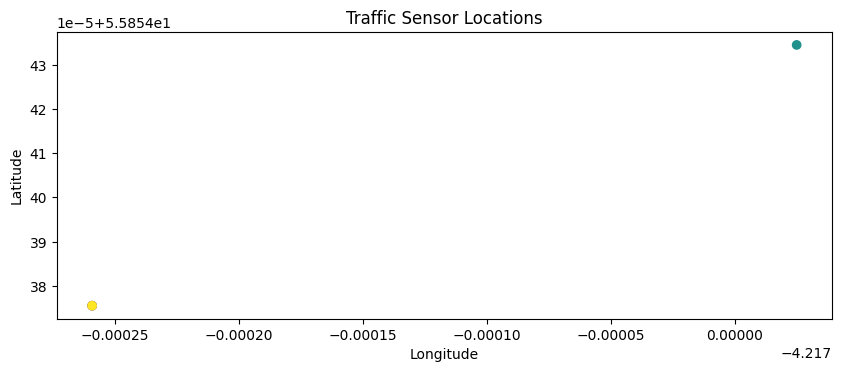

In [81]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame with customized options
trafficsensor_gdf.plot(figsize=(10, 10), cmap='viridis', legend=True)
plt.title('Traffic Sensor Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [92]:
fromtrafficsensor_pd.crs

AttributeError: 'DataFrame' object has no attribute 'crs'

In [ ]:
gdf_bikes_start.explore()

In [ ]:
# Get two separate Geopandas DataFrames, one for the traffic sensors and another one for the WorkingZones.

# Using sJoin ( Spatial Join) https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html calculate the overlay 
#of sensors and polygons.

# Using group_by https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html 
# to count the number of sensors per WorkingZone

# Make sure you add the counts into the WorkingZone polygons of Glasgow so you can create a map of 
# Zones with more and fewer traffic sensors.

# Of course, you will need extra steps where you manipulate the data and extract what you need, for instance, 
# clipping the Working Zones only for Glasgow

In [67]:
#Read shp file - creates a data frame called working_zones
working_zones = gpd.read_file("WorkplaceZones2011Scotland.shp")
working_zones.head()

,LADCD,WZCD,geometry
0,S12000040,S34005373,"POLYGON ((304339.365 666492.616, 304341.959 66..."
1,S12000033,S34000001,"POLYGON ((393511.570 805880.709, 393506.643 80..."
2,S12000033,S34000002,"POLYGON ((393557.291 806046.379, 393563.505 80..."
3,S12000033,S34000003,"POLYGON ((394178.803 806251.348, 394195.604 80..."
4,S12000033,S34000004,"POLYGON ((394179.722 806307.033, 394181.625 80..."


In [69]:
working_zones.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [70]:
working_zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5375 entries, 0 to 5374
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LADCD     5375 non-null   object  
 1   WZCD      5375 non-null   object  
 2   geometry  5375 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 126.1+ KB


In [71]:
working_zones = working_zones.set_crs("EPSG:4326")

ValueError: The GeoSeries already has a CRS which is not equal to the passed CRS. Specify 'allow_override=True' to allow replacing the existing CRS without doing any transformation. If you actually want to transform the geometries, use 'GeoSeries.to_crs' instead.

In [95]:
# Perform a spatial join
joined_gdf = gpd.sjoin(traffic_sensors_gdf, working_zones, how='inner', op='intersects')

# Display the resulting GeoDataFrame
print(joined_gdf.head())

Empty GeoDataFrame
Columns: [description, lat, long, geometry, index_right, LADCD, WZCD]
Index: []


/Users/carlota/miniconda3/envs/ua/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [96]:
joined_gdf.head()

,description,lat,long,geometry,index_right,LADCD,WZCD


## Reading a WMS Service

In [ ]:
m = leafmap.Map(
    center=(56.329031,-3.798943),
    zoom=7
)
wms_url = 'https://maps.gov.scot/server/services/NRS/Census2011/MapServer/WMSServer?'
# A WMS URL include multiple layers, so you need to provide the name you need to load in your map.
# See this: https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/ff882746-e913-4f78-862e-f6e3974fb80e


m.add_wms_layer(url=wms_url, layers='WorkplaceZones2011', name='Census2011', shown=True)
m

# Finishing the Lab

Make sure you save all your code and upload the latest version of this notebook in your GitHub Repo. If you havent created a Repo to store all your Jupyter Notebooks related to the Labs, make sure you create a well and organized GitHub repo where you have the most curated and finished notebooks.
